# Extract, Transform, Load

## Load and Inspect the Data

Understand the raw data — check columns, types, shape, duplicates and any obvious issues

In [92]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.makedirs("images", exist_ok=True)

In [93]:
# Load the dataset
df = pd.read_csv("../data/inputs/raw/BankChurners.csv")
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [94]:
df.shape

(10127, 23)

In [95]:
# Check data types and null values
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [96]:
# Check for duplicates
df.duplicated().sum()

0

# Basic Data Clean

CLIENTNUM — a customer ID, not useful for analysis.
Columns that start with Naive_Bayes_Classifier... we need to remove them 

In [97]:
 # Drop CLIENTNUM as it is not needed
df.drop(columns=['CLIENTNUM'], inplace=True)

# drop all columns starting with "Naive_Bayes_Classifier"

df = df.loc[:, ~df.columns.str.startswith('Naive_Bayes_Classifier')]


# Create the Target Varieble (churn)

We need to convert the text column Attrition_Flag into a binary column churn that we can use for analysis and modeling.
"Existing Customer" → 0 (not churned)
"Attrited Customer" → 1 (churned)

In [98]:
# Create a new column 'Churn' based on 'Attrition_Flag'
df['Churn'] = df['Attrition_Flag'].apply(lambda x: 1 if x == 'Attrited Customer' else 0)

# Drop the 'Attrition_Flag' column
df.drop(columns=["Attrition_Flag"], inplace=True)

# Check the distribution of the 'Churn' column
df['Churn'].value_counts()

Churn
0    8500
1    1627
Name: count, dtype: int64

# Encode Categorical Variables
Convert text columns into numbers so that they can be used in analysis or modeling.

In [99]:
# List of categorical columns to be encoded
cat_cols = ["Gender", "Education_Level", "Marital_Status", "Income_Category",
            "Card_Category"]
# One-hot encode categorical columns
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# check the data types after encoding
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Customer_Age                    10127 non-null  int64  
 1   Dependent_count                 10127 non-null  int64  
 2   Months_on_book                  10127 non-null  int64  
 3   Total_Relationship_Count        10127 non-null  int64  
 4   Months_Inactive_12_mon          10127 non-null  int64  
 5   Contacts_Count_12_mon           10127 non-null  int64  
 6   Credit_Limit                    10127 non-null  float64
 7   Total_Revolving_Bal             10127 non-null  int64  
 8   Avg_Open_To_Buy                 10127 non-null  float64
 9   Total_Amt_Chng_Q4_Q1            10127 non-null  float64
 10  Total_Trans_Amt                 10127 non-null  int64  
 11  Total_Trans_Ct                  10127 non-null  int64  
 12  Total_Ct_Chng_Q4_Q1             

# Feature Engineering
Create new columns that help us better understand customer behavior and predict churn more effectively.

* credit_limit_usage = How much of their credit limit the customer is using.

* avg_balance	= Ratio of average open-to-buy to total credit limit.

* trans_per_month	= Average number of transactions per month.

* avg_amt_per_trans =	Average transaction amount

* tenure_category = Grouping of customers based on how long they've been with the bank

In [100]:
# 1. Credit limit usage ratio
df["credit_limit_usage"] = df["Total_Revolving_Bal"] / df["Credit_Limit"]

# 2.Avarege available balance
df["avg_balance"] = df["Avg_Open_To_Buy"] / df["Credit_Limit"]

# 3. Transaction per month
df["trans_per_month"] = df["Total_Trans_Ct"] / df["Months_on_book"]

# 4. Average amount per transaction
df["avg_amt_per_trans"] = df["Total_Trans_Amt"] / df["Total_Trans_Ct"]

# 5. Tenure Category based on Months_on_book
df["tenure_category"] = pd.cut(
    df["Months_on_book"],
    bins=[0, 12, 24, 36, 48, 60],
    labels=["<1 Year", "1-2 Years", "2-3 Years", "3-4 Years", "4-5 Years"]
)

# Quick check of the new features
df[["credit_limit_usage", "avg_balance", "trans_per_month", "avg_amt_per_trans", "tenure_category"]].head()

,credit_limit_usage,avg_balance,trans_per_month,avg_amt_per_trans,tenure_category
0,0.061224,0.938776,1.076923,27.238095,3-4 Years
1,0.104651,0.895349,0.750000,39.121212,3-4 Years
2,0.000000,1.000000,0.555556,94.350000,2-3 Years
3,0.759734,0.240266,0.588235,58.550000,2-3 Years
4,0.000000,1.000000,1.333333,29.142857,1-2 Years


# Credit Limit Usage by Churn

C:\Users\abitc\AppData\Local\Temp\ipykernel_20832\4016886147.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y="credit_limit_usage", data=df, palette="Set2")


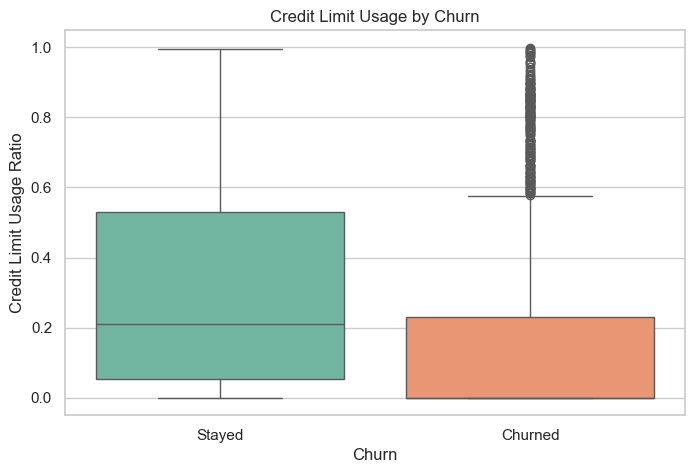

In [101]:
# Set the style
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))

# Boxplot
sns.boxplot(x="Churn", y="credit_limit_usage", data=df, palette="Set2")

# Add title and labels
plt.title("Credit Limit Usage by Churn")
plt.xlabel("Churn")
plt.ylabel("Credit Limit Usage Ratio")
plt.xticks([0, 1], ['Stayed', 'Churned'])

# Save the plot
plt.savefig("../data/inputs/images/credit_limit_usage_by_churn.png", dpi=300, bbox_inches='tight')

# Show the plot

### This chart compares the credit limit usage ratio between customers who stayed and those who churned.

* X-axis: Churn status (Stayed vs Churned)

* Y-axis: Ratio of revolving balance to credit limit (credit_limit_usage)

* Boxplot: Shows the distribution, median, and potential outliers for each group

### Interpretation:
* Churned customers tend to have slightly higher credit limit usage compared to those who stayed.

* The median credit limit usage is higher for churned customers, suggesting that those using more of their credit are more likely to churn.

* There's also greater variability in the usage among customers who churned, indicating financial behavior differences.

### Insight:
High credit utilization might be a risk factor for customer churn. The bank could consider targeting these customers with better credit management offers or support to reduce churn risk.

# Final Clean-up & Export

In [102]:
# Final check for missing values
df.isnull().sum()

# Check final shape and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Customer_Age                    10127 non-null  int64   
 1   Dependent_count                 10127 non-null  int64   
 2   Months_on_book                  10127 non-null  int64   
 3   Total_Relationship_Count        10127 non-null  int64   
 4   Months_Inactive_12_mon          10127 non-null  int64   
 5   Contacts_Count_12_mon           10127 non-null  int64   
 6   Credit_Limit                    10127 non-null  float64 
 7   Total_Revolving_Bal             10127 non-null  int64   
 8   Avg_Open_To_Buy                 10127 non-null  float64 
 9   Total_Amt_Chng_Q4_Q1            10127 non-null  float64 
 10  Total_Trans_Amt                 10127 non-null  int64   
 11  Total_Trans_Ct                  10127 non-null  int64   
 12  Total_Ct_Chng_Q4_Q

In [103]:
df.to_csv("../data/inputs/cleaned/BankChurners_cleaned.csv", index=False)